### 1. Import necessary packages

The first step is to import necessary packages for collecting atoms from given mmcif file, extracting coordinates, plotting and perform PCA. The required packages and the corresponding purpose are as follows:

1. Bio.PDB: Read the given mmcif file and collect Cα atoms
2. Numpy: Manipulate coordinates information. 
3. Matplotlib: Data visualization and plotting.
4. Sklearn: Perform principle component analysis. 

In [2]:
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 2. Read the mmcif file

Next, we use functions from Biopython library to read the given mmcif file. Since the given file only contains a single model and a single chain, we use 
```ruby
chain = structure[0]['A']
``` 
to access the desired chain.

In [3]:
parser = MMCIFParser()
structure = parser.get_structure("Cα", "1dg3.cif")
chain = structure[0]['A']

### 3. Collect 3D coordinates of Cα atoms

After we have access to the chain that contains all Cα atoms, ```chain.get_atoms()``` is used to access each individual atom. In addition, given that we only need to extract Cα atoms, we filter out any atoms that are not of the type "Cα" and save the coordinate information of Cα atoms as a list of ndarrays.

In [4]:
lst_of_coor = []
for atom in chain.get_atoms(): #go through all atom in the given chain
    if atom.get_id() == "CA":
        lst_of_coor.append(atom.get_coord())
        
type(lst_of_coor[0])

numpy.ndarray

### 4. Plot Cα coordinates on the plane z=0

With 3D coordinates collected for all Cα atoms, coordinate for each axis is extracted and stored into corresponding variables. Since the plot is on the plane z=0, coordinates other than z(x and y) are displayed as scatter plot. The result is shown as follows.

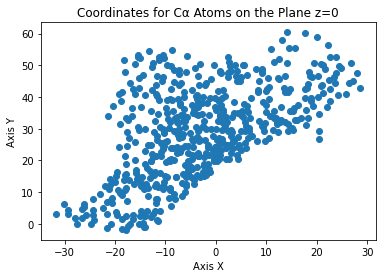

In [9]:
coor = np.vstack(lst_of_coor)
x = coor[:, 0]
y = coor[:, 1]
z = coor[:, 2]

plt.scatter(x, y)

plt.title('Coordinates for Cα Atoms on the Plane z=0')
plt.xlabel('Axis X')
plt.ylabel('Axis Y')

plt.show()

### 5. Compute PCA on Cα coordinates and plot result

Next, we will perform principle component analysis on the coordinate information of Cα atoms to achieve dimensionality reduction with minimum information loss. To perform PCA, we use the library Sklearn, setting the number of components to 2, fitting the model with coordinate information and apply dimensionality reduction on such information. The result is shown as follows. 

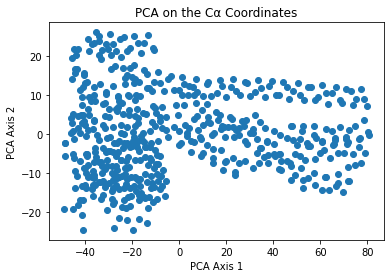

Amount of Variance Explained by PCA Axis 1: 91.91%
Amount of Variance Explained by PCA Axis 2: 8.09%


In [28]:
pca = PCA(n_components=2)
new_coor = pca.fit_transform(coor)
new_x = new_coor[:, 0]
new_y = new_coor[:, 1]

plt.scatter(new_x, new_y)

plt.title('PCA on the Cα Coordinates')
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')

plt.show()
var_ammount1 = pca.explained_variance_ratio_[0] / pca.explained_variance_ratio_.sum()
var_ammount2 = pca.explained_variance_ratio_[1] / pca.explained_variance_ratio_.sum()
print("Amount of Variance Explained by PCA Axis 1: " + str(round(var_ammount1*100, 2)) + "%")
print("Amount of Variance Explained by PCA Axis 2: " + str(round(var_ammount2*100, 2)) + "%")

### Result
From plots that are displayed above, it is obvious that these two plots are different. And such difference can be explained by the amount of information carried by the first two axis. <br>

In the first plot where coordinates are plotted on the plane z = 0, only information about x and y axis are presented while information about z axis is abandoned. However, from the amount of variance explained by PCA axis 1 and 2, we know that almost all of variance about the coordinate information can be explained with these 2 axis combined. Thus the pca plot tends to be more reminiscent of the original 3d coordinates information by maintaining almost all variation in the entire data set. While the plot on plane z=0 loses many information about z axe and its correlation with other axis so it fails to portray the original coordinate information accurately. <br>

In addition, since PCA manages to achieve dimensionality reduction while preserving most of variations in the original data set, the result from PCA will look similar to the 3D view of the 1DG3 protein.